In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)\
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
# from sklearn.linear_model import LinearRegression
from sklearn import neighbors

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_data=pd.read_csv('/kaggle/input/titanic/train.csv')
train_data['Age'].fillna(value= 30.0,inplace=True)
test_data=pd.read_csv('/kaggle/input/titanic/test.csv')
test_data['Age'].fillna(value= 30.0,inplace=True)
test_data.fillna(value= 30.0,inplace=True)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        418 non-null    object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


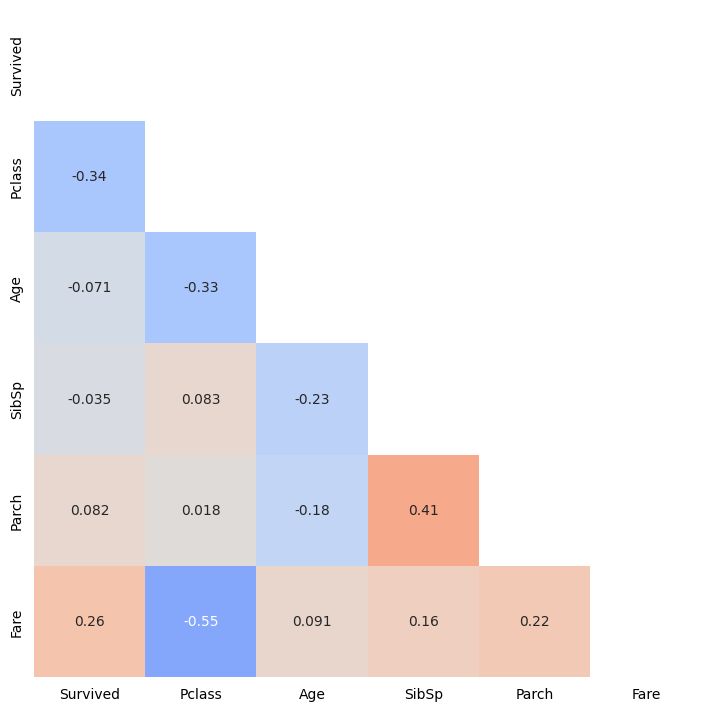

In [4]:
labels = ['Survived','Pclass','Age','SibSp','Parch','Fare']
fig, ax = plt.subplots(figsize=(7, 7), constrained_layout=True)
corr_df=train_data[labels]
# corr_df.loc[corr_df['Sex']=='male']=0
# corr_df.loc[corr_df['Sex']=='female']=1
# corr_df['Sex']=corr_df['Sex'].astype(float)
corr =corr_df.corr()
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr, cbar=False, mask=mask,ax=ax,annot=True, cmap='coolwarm',vmin=-1,vmax=1)
ax.tick_params(top=False,bottom=False,left=False,right=False,)

In [5]:
# KNeighborsClassifier()=0.7
# LinearRegression() = 0.2510071750905766
# svm.SVC() = 0.8
# RandomForestClassifier() = 1.0 ?!

train_data1=train_data[:-10]
train_data2=train_data[-10:]
y_train = train_data1["Survived"]
y_test =train_data2["Survived"]
features = ["Pclass", "Sex", "Age", "Fare"]
X = pd.get_dummies(train_data1[features])
X_test = pd.get_dummies(train_data2[features])
model = RandomForestClassifier()
model.fit(X, y_train)
accuracy = model.score(X_test,y_test)
print(accuracy)

y = train_data["Survived"]
features = ["Pclass", "Sex", "Age", "Fare"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])
# model = RandomForestClassifier()
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

0.9
Your submission was successfully saved!
